# Assignment7:
## KNN 
Download data set for two exam results from given link:
https://docs.google.com/document/d/1Mly1qOrqKONOOWFze7hOg5hUy3_omx2o/edit#

Divide the data into three parts: 1-30 , 31-60,61-90. \
According to the table given, take the respective part of data and apply the KNN algorithm with K=3 and K=5 :\
Regression for data(91-100). \
Classification of data(91-100). \
Also compute the accuracy. 

In [118]:
#loading Required Packages
import numpy as np
import matplotlib.pyplot as plt

### Read dataset (Group_2):

In [119]:
read_data = np.loadtxt("dataset.txt",delimiter=',')
#for group 2
train_data = read_data[30:60]     #31-60  Testing dataset
test_data  = read_data[90:]       #91-100 Training dataset

x_train=train_data[:,:-1]
y_train=train_data[:,-1:].flatten()

x_test =test_data[:,:-1]
y_test =test_data[:,-1:].flatten()

print(x_train.shape,y_train.shape)

(30, 2) (30,)


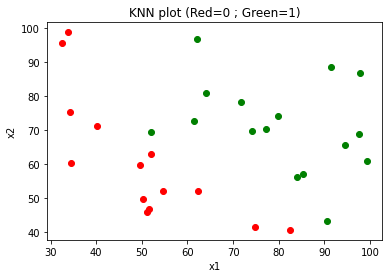

In [120]:
# function plot to plot knn training dataset
def plot(x_train,y_train,x_test_point=None):
    class_0=[]
    class_1=[]
    for i in range(x_train.shape[0]):
        if y_train[i]==0:
            class_0.append(x_train[i])
        else:
            class_1.append(x_train[i])
            
    class_0 = np.array(class_0)
    class_1 = np.array(class_1)
    plt.scatter(class_0[:,0],class_0[:,1],color='red')
    plt.scatter(class_1[:,0],class_1[:,1],color='green')
    if x_test_point is not None:
        plt.scatter(x_test_point[0],x_test_point[1],color='yellow',)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("KNN plot (Red=0 ; Green=1)")
    plt.show()

plot(x_train,y_train)

### Eucliden distance :
\begin{equation}
distance = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 +...+(x_n-y_n)^2}
\end{equation}

In [121]:
#calculating Euclidean distance
def distance(x1,x2):
    x1 = x1.flatten()
    x2 = x2.flatten()
    sum = 0
    for i in range(len(x1)):
        sum += (int(x1[i])-int(x2[i]))**2
    return np.sqrt(sum)

In [122]:
#get k nearest point O(nk) using selection sort technique
def getKNearest(d,k):
    near = []
    for i in range(k):
        min_d = 1000000*1000000
        n = None
        pos = None
        for j in range(len(d)):
            if(d[j][0]<0):
                continue
            if(d[j][0]<min_d):
                min_d = d[j][0]
                pos = j
        if pos is not None:
            near.append([min_d,d[pos][1]])
            d[pos][0] = -1
    return near

# Classification :
1.find distance from all training dataset. \
2.select shortest k distance. \
3.compute the frequency of class in shortest k distance. \
4.maximum frequency is output

In [123]:
#knn_classification                
def knn_classification(x,x_train,y_train,k):
    d = []
    
    for i in range(len(x_train)):
        d.append([distance(x_train[i],x),i])
        
    knear = getKNearest(d,k)
    
    freq={}
    max_f = 0
    max_value =None
    for x in knear:
        if y_train[x[1]] in freq.keys():
            freq[y_train[x[1]]] += 1
        else:
            freq[y_train[x[1]]] = 1
    
        if freq[y_train[x[1]]]>max_f:
            max_f = freq[y_train[x[1]]]
            max_v = y_train[x[1]]
    return max_v

def classification_rate(x_train,y_train,x_test,y_test,k=3):    # find accuracy.
    count = 0
    for i in range(len(x_test)):
        predict=knn_classification(x_test[i],x_train,y_train,k)
        if(predict==y_test[i]):
            count += 1
    return (count*100)/x_test.shape[0]

### Prediction Testing(K=3):

Predict  -> 1.0


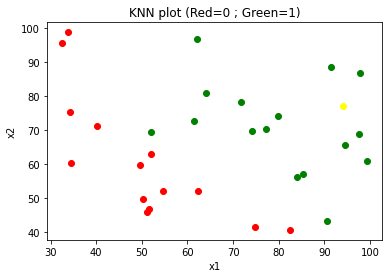

Predict  -> 1.0


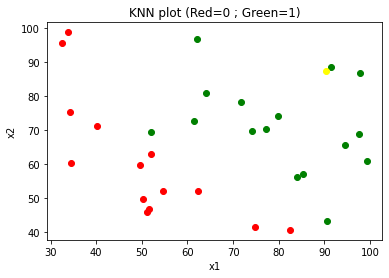

Predict  -> 0.0


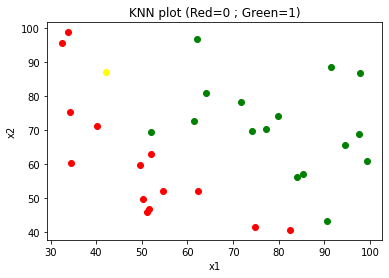

In [124]:
print("Predict  ->",knn_classification(x_test[0],x_train,y_train,k=3))
plot(x_train,y_train,x_test[0])

print("Predict  ->",knn_classification(x_test[1],x_train,y_train,k=3))
plot(x_train,y_train,x_test[1])

print("Predict  ->",knn_classification(x_test[6],x_train,y_train,k=3))
plot(x_train,y_train,x_test[6])

### Prediction testing(k=5):

Predict  -> 1.0


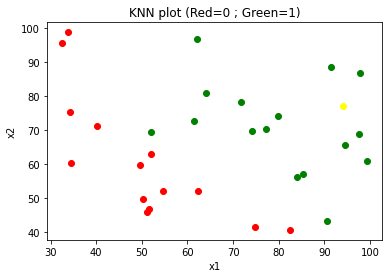

Predict  -> 1.0


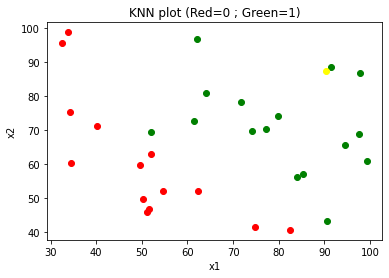

Predict  -> 0.0


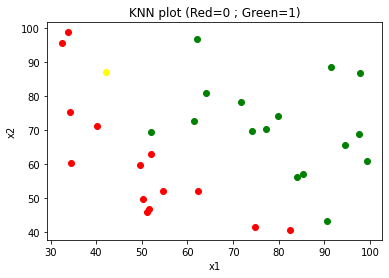

In [125]:
print("Predict  ->",knn_classification(x_test[0],x_train,y_train,k=5))
plot(x_train,y_train,x_test[0])

print("Predict  ->",knn_classification(x_test[1],x_train,y_train,k=5))
plot(x_train,y_train,x_test[1])

print("Predict  ->",knn_classification(x_test[6],x_train,y_train,k=5))
plot(x_train,y_train,x_test[6])

### Knn classification  (k vs Accuracy):

Accuracy(K = 1 ) -> 80.0
Accuracy(K = 2 ) -> 80.0
Accuracy(K = 3 ) -> 80.0
Accuracy(K = 4 ) -> 80.0
Accuracy(K = 5 ) -> 80.0
Accuracy(K = 6 ) -> 80.0
Accuracy(K = 7 ) -> 80.0
Accuracy(K = 8 ) -> 80.0
Accuracy(K = 9 ) -> 80.0
Accuracy(K = 10 ) -> 80.0
Accuracy(K = 11 ) -> 80.0
Accuracy(K = 12 ) -> 80.0
Accuracy(K = 13 ) -> 80.0
Accuracy(K = 14 ) -> 80.0
Accuracy(K = 15 ) -> 80.0
Accuracy(K = 16 ) -> 80.0
Accuracy(K = 17 ) -> 80.0
Accuracy(K = 18 ) -> 80.0
Accuracy(K = 19 ) -> 80.0
Accuracy(K = 20 ) -> 80.0
Accuracy(K = 21 ) -> 80.0
Accuracy(K = 22 ) -> 80.0
Accuracy(K = 23 ) -> 80.0
Accuracy(K = 24 ) -> 80.0
Accuracy(K = 25 ) -> 70.0
Accuracy(K = 26 ) -> 70.0
Accuracy(K = 27 ) -> 80.0
Accuracy(K = 28 ) -> 80.0
Accuracy(K = 29 ) -> 90.0


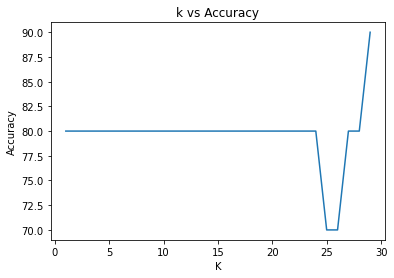

In [162]:
#plotting K VS Accuracy
acc = []
k_list = []
for i in range(1,30):
    accuracy = classification_rate(x_train,y_train,x_test,y_test,k=i)
    print("Accuracy(K =",i,") ->",accuracy)
    acc.append(accuracy)
    k_list.append(i)
    
plt.plot(k_list,acc)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.show()

# KNN Regression :

In [135]:
#from given data set first column is x_train
#second column is y_train
#third column is not taken
x_train_reg = train_data[:,0:1]
y_train_reg = train_data[:,1]

x_test_reg = test_data[:,:1]
y_test_reg = test_data[:,1]


[[61.37928945]
 [85.40451939]
 [52.10797973]
 [52.04540477]
 [40.23689374]]
[72.80788731 57.05198398 63.12762377 69.43286012 71.16774802]


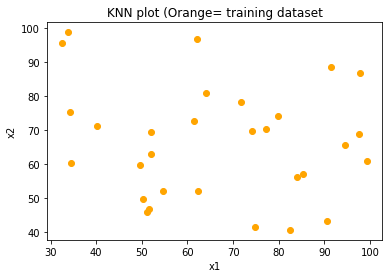

In [177]:
# function plot to plot knn training dataset
def plot_reg(x_train,y_train,x_test_point=None,y_test_point=None):
    
    plt.scatter(x_train,y_train,color='orange')
    if x_test_point is not None:
        plt.scatter(x_test_point[0],y_test_point,color='blue')
        plt.title("KNN plot (Orange= training dataset ; blue = Actual;red=predicted)")
    else:
        plt.title("KNN plot (Orange= training dataset")
    plt.xlabel("x1")
    plt.ylabel("x2")
    
    plt.show()

plot_reg(x_train_reg,y_train_reg)

In [178]:
#knn_regression  algorithm          
def knn_regression(x,x_train,y_train,k):
    d = []
    
    for i in range(len(x_train)):
        d.append([distance(x_train[i],x),i])
        
    knear = getKNearest(d,k)    #find k nearest point
    
    sum_weight=0
    for x in knear:
        sum_weight += y_train[x[1]]
        
    return sum_weight/k        #return mean of those point

def error_regression(x_train,y_train,x_test,y_test,k=3):
    error = 0
    for i in range(len(x_test)):
        predict=knn_regression(x_test[i],x_train,y_train,k)
        error += distance(x_test[i],predict)
    return error/x_test.shape[0]

### Testing KNN regression (k=3):

y_predict -> 80.33101216036158
y_actual  -> [94.09433113]


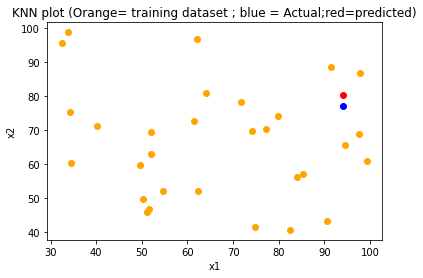

In [179]:
output = knn_regression(x_test_reg[0],x_train_reg,y_train_reg,k=3)
print("y_predict ->",output)
print("y_actual  ->",x_test_reg[0])
plt.scatter(x_test_reg[0],output,color="red")
plot_reg(x_train_reg,y_train_reg,x_test_reg[0],y_test_reg[0])



y_predict -> 60.61872881887529
y_actual  -> [74.49269242]


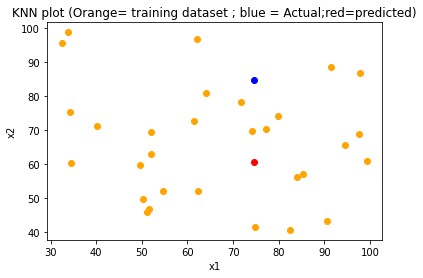

In [180]:
output = knn_regression(x_test_reg[3],x_train_reg,y_train_reg,k=3)
print("y_predict ->",output)
print("y_actual  ->",x_test_reg[3])
plt.scatter(x_test_reg[3],output,color="red")
plot_reg(x_train_reg,y_train_reg,x_test_reg[3],y_test_reg[3])



In [159]:
print("y_predict ->",knn_regression(x_test_reg[8],x_train_reg,y_train_reg,k=3))
print("y_actual  ->",x_test_reg[8])


y_predict -> 61.591456589960195
y_actual  -> [55.34001756]


### Testing KNN regression (k=5)

y_predict -> 70.64904220235822
y_actual  -> [94.09433113]


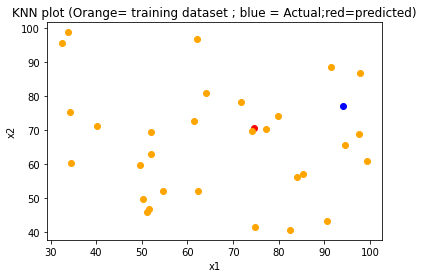

In [181]:
output = knn_regression(x_test_reg[0],x_train_reg,y_train_reg,k=5)
print("y_predict ->",output)
print("y_actual  ->",x_test_reg[0])
plt.scatter(x_test_reg[3],output,color="red")
plot_reg(x_train_reg,y_train_reg,x_test_reg[0],y_test_reg[0])


In [160]:
print("y_predict ->",knn_regression(x_test_reg[4],x_train_reg,y_train_reg,k=5))
print("y_actual  ->",x_test_reg[4])


y_predict -> 62.20316922997624
y_actual  -> [89.84580671]


In [161]:
print("y_predict ->",knn_regression(x_test_reg[9],x_train_reg,y_train_reg,k=5))
print("y_actual  ->",x_test_reg[9])


y_predict -> 66.89457361044279
y_actual  -> [74.775893]


### KNN regression ( k vs Error)

Error(K = 1 ) -> 28.9
Error(K = 2 ) -> 19.1
Error(K = 3 ) -> 19.0
Error(K = 4 ) -> 17.1
Error(K = 5 ) -> 16.5
Error(K = 6 ) -> 19.0
Error(K = 7 ) -> 18.6
Error(K = 8 ) -> 18.5
Error(K = 9 ) -> 18.7
Error(K = 10 ) -> 19.5
Error(K = 11 ) -> 19.3
Error(K = 12 ) -> 20.0
Error(K = 13 ) -> 20.1
Error(K = 14 ) -> 19.0
Error(K = 15 ) -> 18.9
Error(K = 16 ) -> 19.7
Error(K = 17 ) -> 18.7
Error(K = 18 ) -> 18.8
Error(K = 19 ) -> 19.2
Error(K = 20 ) -> 19.6
Error(K = 21 ) -> 19.4
Error(K = 22 ) -> 19.6
Error(K = 23 ) -> 20.3
Error(K = 24 ) -> 20.5
Error(K = 25 ) -> 20.2
Error(K = 26 ) -> 20.5
Error(K = 27 ) -> 19.8
Error(K = 28 ) -> 20.1
Error(K = 29 ) -> 19.4


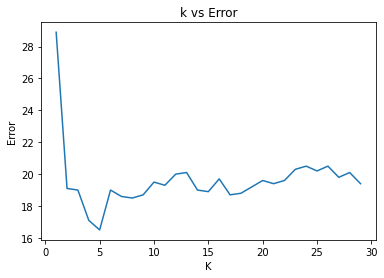

In [184]:
error = []
k_list = []
for i in range(1,30):
    e = error_regression(x_train_reg,y_train_reg,x_test_reg,y_test_reg,k=i)
    print("Error(K =",i,") ->",e)
    error.append(e)
    k_list.append(i)

    
plt.plot(k_list,error)
plt.xlabel("K")
plt.ylabel("Error")
plt.title("k vs Error")
plt.show()


## Analysis : 
Classification :
<ul>
    <li>Average Classification Accuracy for different value of k=80%</li>
    <li>Classification Accuracy have very little affect on accuracy(smaller dataset)</li>
    <li>For better analysis testing dataset should be near decision boundary.</li>
    <li>Compared to Logistic regression, runtime is very less for our dataset.</li>
</ul>


Regression :

<ul>
    <li>Average Error for different values of k= 19</li>
    <li>K have very little effect on error for our dataset</li>
    <li>Runtime is very less compared to gradient descent</li>
    <li>Dataset for regression using knn is distributed which is not good training dataset(our dataset),as in regression we do not have to find decision boundary</li>
</ul>